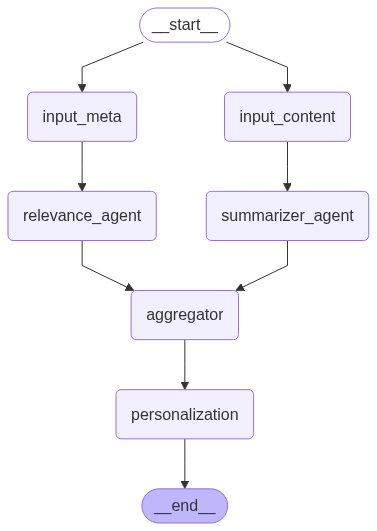

🎓 Final Feedback by Dr. Ahmad Yunus:

Salam, [Student Name],

I see you've got a good foundation for your assignment on urban sustainability in Southeast Asia.  This is a vital topic, and I commend you for focusing on it.

**Here are some thoughts to help you strengthen your outline:**

**What's Working Well:**

* **Clear Focus:** You've got a good grasp of the key issues facing Southeast Asian cities. 
* **Relevant Case Studies:** Jakarta and Bangkok are excellent choices, as they offer real-world examples of the challenges and potential solutions.
* **Strong Title and Description:**  The title and description work well together, giving a clear picture of your assignment.

**Areas to Develop:**

* **Deeper Dive into Challenges:** While you've listed population density, flooding, and transportation,  think about the *specific impacts* of these issues. How do they affect the environment, people's daily lives, and the economy in Southeast Asian cities? 
* **Specificity of Solutions:**  T

In [1]:
import getpass
import os

from IPython.display import Image, display
from langchain_groq import ChatGroq
from langgraph.graph import END, START, StateGraph
from typing_extensions import TypedDict


# Setup Groq API key
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("GROQ_API_KEY")
llm = ChatGroq(model="gemma2-9b-it")


# ----- State definition -----
class AssignmentMeta(TypedDict):
    title: str
    description: str


class State(TypedDict):
    assignment_meta: AssignmentMeta
    assignment_content: str
    summary: str
    relevance_analysis: str
    feedback_analysis: str
    personalized_feedback: str
    combined_output: str


# ----- Input Nodes -----
def input_meta(state: State):
    return {"assignment_meta": state["assignment_meta"]}


def input_content(state: State):
    return {"assignment_content": state["assignment_content"]}


# ----- AI Agent Nodes -----
def summarizer_agent(state: State):
    content = state["assignment_content"]
    msg = llm.invoke(f"Summarize the following assignment content:\n\n{content}")
    return {"summary": msg.content}


def relevance_agent(state: State):
    title = state["assignment_meta"]["title"]
    desc = state["assignment_meta"]["description"]
    prompt = f"""
Analyze the relevance between the following title and description of an assignment:

Title: {title}
Description: {desc}

Does the title appropriately reflect the content described? Provide analysis.
"""
    msg = llm.invoke(prompt)
    return {"relevance_analysis": msg.content}


# ----- Aggregator Node -----
def aggregator(state: State):
    summary = state["summary"]
    relevance = state["relevance_analysis"]

    feedback_prompt = f"""
You are an academic evaluator. Provide constructive feedback based on the following:

SUMMARY:
{summary}

RELEVANCE ANALYSIS:
{relevance}
"""
    feedback = llm.invoke(feedback_prompt).content

    personalization_prompt = f"""
As Professor Dr. Ahmad Yunus, personalize the following academic feedback for a student:

FEEDBACK:
{feedback}
"""
    personalized = llm.invoke(personalization_prompt).content

    combined = f"🎓 Final Feedback by Dr. Ahmad Yunus:\n\n{personalized}"

    return {"feedback_analysis": feedback, "personalized_feedback": personalized, "combined_output": combined}


def personalization(state: State):
    feedback = state["feedback_analysis"]
    personalization_prompt = f"""
As Professor Dr. Ahmad Yunus, personalize the following academic feedback for a student:

FEEDBACK:
{feedback}
"""
    personalized = llm.invoke(personalization_prompt).content
    combined = f"🎓 Final Feedback by Dr. Ahmad Yunus:\n\n{personalized}"
    return {"personalized_feedback": personalized, "combined_output": combined}


# ----- Build the Graph -----
builder = StateGraph(State)

# Add nodes
builder.add_node("input_meta", input_meta)
builder.add_node("input_content", input_content)
builder.add_node("relevance_agent", relevance_agent)
builder.add_node("summarizer_agent", summarizer_agent)
builder.add_node("aggregator", aggregator)
builder.add_node("personalization", personalization)

# Connect edges
builder.add_edge(START, "input_meta")
builder.add_edge(START, "input_content")
builder.add_edge("input_meta", "relevance_agent")
builder.add_edge("input_content", "summarizer_agent")
builder.add_edge("relevance_agent", "aggregator")
builder.add_edge("summarizer_agent", "aggregator")
builder.add_edge("aggregator", "personalization")
builder.add_edge("personalization", END)

# Compile the workflow
workflow = builder.compile()

# Visualize the graph
display(Image(workflow.get_graph().draw_mermaid_png()))

# ----- Run the workflow -----
state = workflow.invoke(
    {
        "assignment_meta": {
            "title": "Sustainable Urban Planning",
            "description": "Analyze urban sustainability strategies in Southeast Asian megacities.",
        },
        "assignment_content": """
Urban sustainability in Southeast Asia faces challenges like population density, flooding, and transport inefficiencies.
Green corridors, public transit, and zoning laws can enhance livability.
Jakarta and Bangkok are case studies with both success and setbacks.
""",
    }
)

# Output
print(state["combined_output"])